In [2]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [3]:
!kaggle datasets download -d parulpandey/emotion-dataset -p /content/text_dataset

Dataset URL: https://www.kaggle.com/datasets/parulpandey/emotion-dataset
License(s): CC0-1.0
100% 715k/715k [00:01<00:00, 721kB/s]
100% 715k/715k [00:01<00:00, 721kB/s]


In [4]:
import zipfile

def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract text dataset
text_zip_path = '/content/text_dataset/emotion-dataset.zip'
extract_zip(text_zip_path, '/content/text_dataset')


In [5]:
import pandas as pd

# Load text data
text_df = pd.read_csv('/content/text_dataset/training.csv')  # Adjust path if needed
text_df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
print("\nNumber of rows and columns in the dataset:")
print(text_df.shape)


Number of rows and columns in the dataset:
(16000, 2)


In [7]:
print("\nSummary statistics:")
print(text_df.describe())


print("\nMissing values:")
print(text_df.isnull().sum())


Summary statistics:
              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000

Missing values:
text     0
label    0
dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

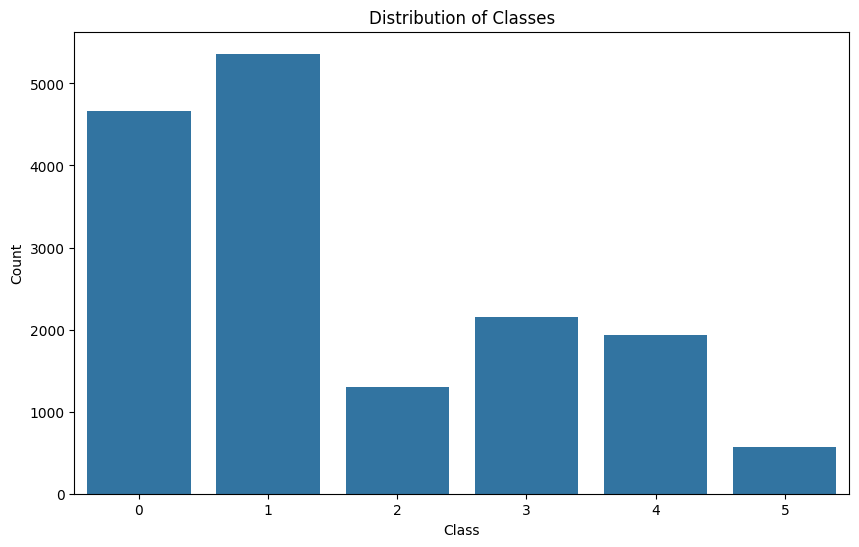

In [9]:
if 'label' in text_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=text_df, x='label')
    plt.title('Distribution of Classes')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

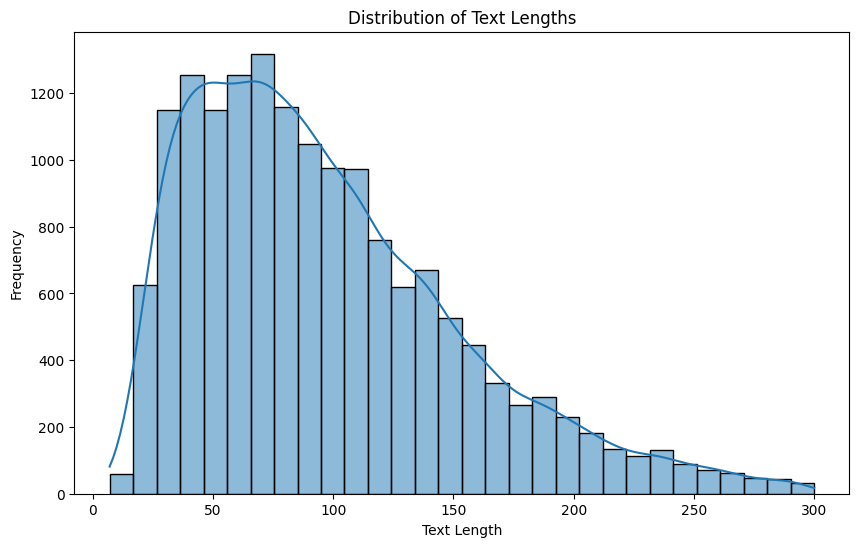


Summary statistics of text lengths:
count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: text_length, dtype: float64


In [10]:
if 'text' in text_df.columns:
    text_df['text_length'] = text_df['text'].apply(len)

    plt.figure(figsize=(10, 6))
    sns.histplot(text_df['text_length'], kde=True, bins=30)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    print("\nSummary statistics of text lengths:")
    print(text_df['text_length'].describe())

In [11]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_text_features(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
!kaggle datasets download -d ananthu017/emotion-detection-fer/


Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/versions/
License(s): CC0-1.0
 98% 64.0M/65.2M [00:04<00:00, 25.3MB/s]
100% 65.2M/65.2M [00:04<00:00, 16.3MB/s]


In [13]:
import zipfile
import os


def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)


In [14]:
# Extract image dataset
image_zip_path = '/content/emotion-detection-fer.zip'
extract_zip(image_zip_path, '/content/image_dataset')

Extracted '/content/emotion-detection-fer.zip' to '/content/image_dataset'


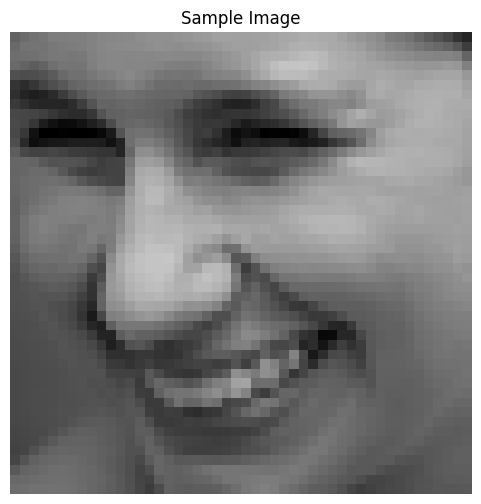

In [15]:
import zipfile
import os
import matplotlib.pyplot as plt
import cv2

# Function to extract zip file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted '{zip_path}' to '{extract_to}'")

# Extract image dataset
image_zip_path = '/content/emotion-detection-fer.zip'
image_dataset_path = '/content/image_dataset'
extract_zip(image_zip_path, image_dataset_path)

# Display a sample image
sample_image_path = '/content/image_dataset/train/happy/im1009.png'  # Update with actual subfolder and filename

# Load and display the image
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.title('Sample Image')
plt.axis('off')
plt.show()


In [16]:
import os
from torchvision import models, transforms
from PIL import Image
import torch
import numpy as np

# Load the ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def extract_image_features(image_path):
    image = preprocess(Image.open(image_path))
    with torch.no_grad():
        features = model(image.unsqueeze(0))
    return features.squeeze().numpy()

# Example function to get image file paths and labels
def load_image_data_from_directory(directory):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assuming subdirectories are class names

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(label)

    return image_paths, labels

# Load training and test data
train_image_paths, train_labels = load_image_data_from_directory('/content/image_dataset/train')
test_image_paths, test_labels = load_image_data_from_directory('/content/image_dataset/test')

print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of test images: {len(test_image_paths)}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 211MB/s]


Number of training images: 28709
Number of test images: 7178


In [17]:
import os
import torch
import numpy as np
from torchvision import models, transforms
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained ResNet model
model = models.resnet50(pretrained=True)

# Extract features from the penultimate layer (before the classification layer)
model = nn.Sequential(*list(model.children())[:-1])  # Removes the final classification layer

model.eval()
model.to(device)

# Define the image transformations, including data augmentation
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),  # Data Augmentation: Random Horizontal Flip
    transforms.RandomRotation(10),      # Data Augmentation: Random Rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class ImageDataset(Dataset):
    def __init__(self, image_paths, labels):
        self.image_paths = image_paths
        self.labels = labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        image = preprocess(image)
        label = self.labels[idx]
        return image, label

# Function to extract features from a batch of images
def extract_features_batch(images):
    with torch.no_grad():
        images = images.to(device)
        features = model(images).squeeze()  # Penultimate layer output
    return features.cpu().numpy()

# Function to get image file paths and labels from directories
def load_image_data_from_directory(directory):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assuming subdirectories are class names

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(label)

    return image_paths, labels

# Load training and test data
train_image_paths, train_labels = load_image_data_from_directory('/content/image_dataset/train')
test_image_paths, test_labels = load_image_data_from_directory('/content/image_dataset/test')

print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of test images: {len(test_image_paths)}")

# Prepare dataset and dataloader
batch_size = 32
train_dataset = ImageDataset(train_image_paths, train_labels)
test_dataset = ImageDataset(test_image_paths, test_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Function to extract features for the whole dataset
def extract_features(loader):
    all_features = []
    all_labels = []
    for images, labels in loader:
        features = extract_features_batch(images)
        all_features.append(features)
        all_labels.append(labels.numpy())

# Extract features for training and test sets
train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

print(f"Training features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")

# Save the features for later use (if needed)
np.save('train_features.npy', train_features)
np.save('train_labels.npy', train_labels)
np.save('test_features.npy', test_features)
np.save('test_labels.npy', test_labels)


Number of training images: 28709
Number of test images: 7178
Training features shape: (28709, 2048)
Test features shape: (7178, 2048)


In [18]:
!kaggle datasets download -d uldisvalainis/audio-emotions


Dataset URL: https://www.kaggle.com/datasets/uldisvalainis/audio-emotions
License(s): unknown
100% 1.12G/1.12G [00:52<00:00, 24.1MB/s]
100% 1.12G/1.12G [00:52<00:00, 22.9MB/s]


In [19]:
# Extract audio dataset
import zipfile

def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

audio_zip_path = '/content/audio-emotions.zip'
extract_zip(audio_zip_path, '/content/audio_dataset')


In [20]:
import os

# Function to count class labels and audio files
def count_classes_and_files(base_dir):
    class_labels = []
    audio_files_count = 0

    # Iterate through each class directory
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            class_labels.append(class_name)
            # Count the number of audio files in the class directory
            audio_files_count += len([f for f in os.listdir(class_dir) if f.endswith(('.wav', '.mp3', '.flac'))])

    return class_labels, audio_files_count

# Path to the extracted audio dataset
extracted_audio_dir = '/content/audio_dataset/Emotions'

# Count class labels and audio files
class_labels, total_audio_files = count_classes_and_files(extracted_audio_dir)

# Display the results
print(f"Number of class labels: {len(class_labels)}")
print(f"Class labels: {class_labels}")
print(f"Total number of audio files: {total_audio_files}")


Number of class labels: 7
Class labels: ['Neutral', 'Sad', 'Disgusted', 'Suprised', 'Angry', 'Happy', 'Fearful']
Total number of audio files: 12798


In [21]:
import os
import IPython.display as ipd

# Path to the directory containing audio files
audio_dir = '/content/audio_dataset/Emotions'

# List all files in the directory
audio_files = os.listdir(audio_dir)

# Display the first audio file (you can change the index to display a different file)
sample_audio_path = '/content/audio_dataset/Emotions/Suprised/03-01-08-01-01-01-03.wav'
print(f"Playing sample audio file: {audio_files[0]}")
ipd.display(ipd.Audio(sample_audio_path))


Playing sample audio file: Neutral


In [22]:
import os
import librosa
import numpy as np
import soundfile as sf


In [23]:
def load_audio(file_path, sr=None):
    """Load an audio file."""
    audio, sample_rate = librosa.load(file_path, sr=sr)
    return audio, sample_rate

def resample_audio(audio, orig_sr, target_sr):
    """Resample audio to a target sample rate."""
    return librosa.resample(audio, orig_sr=orig_sr, target_sr=target_sr)

def trim_silence(audio):
    """Trim silence from the beginning and end of an audio clip."""
    return librosa.effects.trim(audio)[0]

def normalize_audio(audio):
    """Normalize audio to be in the range [-1, 1]."""
    return librosa.util.normalize(audio)

def extract_mfcc(audio, sr, n_mfcc=13):
    """Extract MFCC features from audio."""
    return librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

def preprocess_audio_file(file_path, target_sr=16000):
    """Preprocess a single audio file."""
    audio, sr = load_audio(file_path)
    audio = resample_audio(audio, sr, target_sr)
    audio = trim_silence(audio)
    audio = normalize_audio(audio)
    mfccs = extract_mfcc(audio, target_sr)
    return mfccs


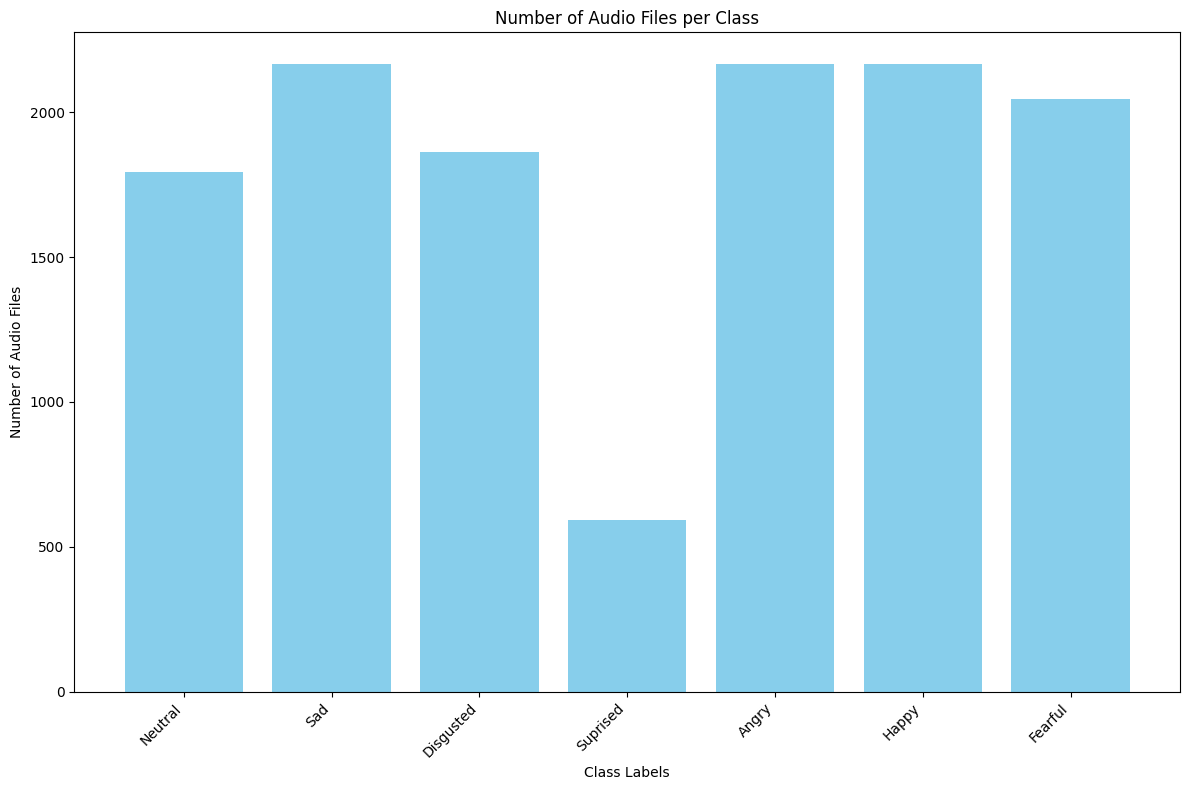

In [24]:
import os
import matplotlib.pyplot as plt

def count_files_per_class(base_dir):
    class_counts = {}

    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            file_count = len([f for f in os.listdir(class_dir) if f.endswith(('.wav', '.mp3', '.flac'))])
            class_counts[class_name] = file_count

    return class_counts

# Path to the extracted audio dataset
extracted_audio_dir = '/content/audio_dataset/Emotions'

# Count the number of audio files per class
class_file_counts = count_files_per_class(extracted_audio_dir)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(class_file_counts.keys(), class_file_counts.values(), color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Audio Files')
plt.title('Number of Audio Files per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


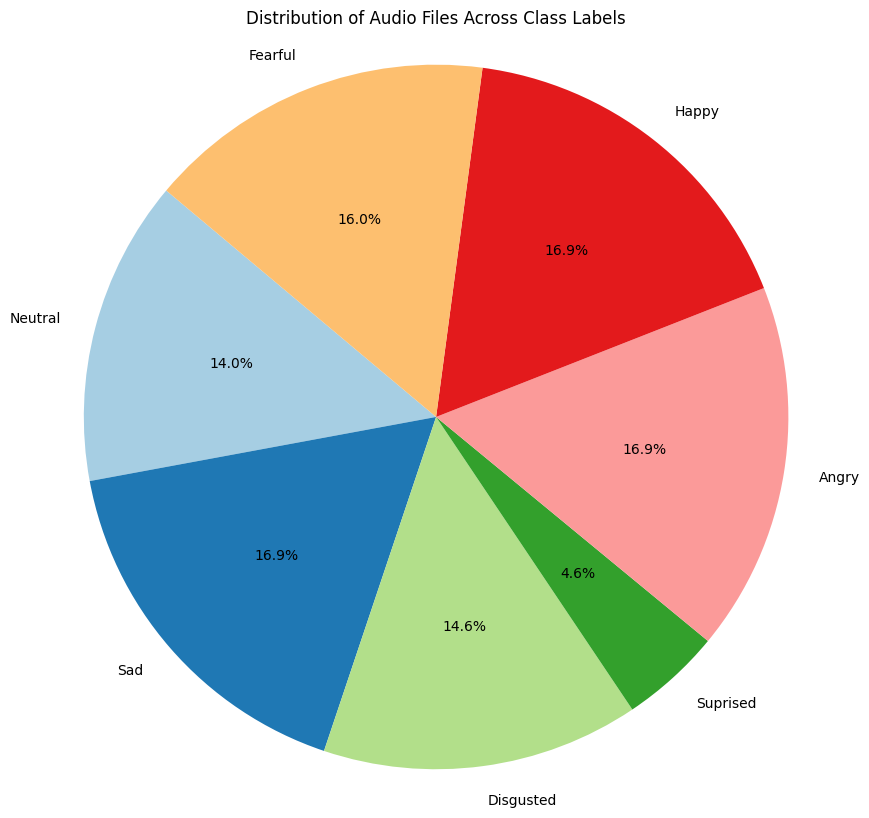

In [25]:
import matplotlib.pyplot as plt

# Extract the class labels and counts
labels = list(class_file_counts.keys())
sizes = list(class_file_counts.values())

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
plt.title('Distribution of Audio Files Across Class Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [26]:
import os
import librosa
import numpy as np
from torch.utils.data import Dataset, DataLoader
import multiprocessing as mp
import time
import random

# Function to apply data augmentation on audio
def augment_audio(y, sr):
    # Apply random time stretch, pitch shift, and noise addition
    if random.random() > 0.5:
        y = librosa.effects.time_stretch(y, rate=random.uniform(0.8, 1.2))  # Time-stretch
    if random.random() > 0.5:
        y = librosa.effects.pitch_shift(y, sr=sr, n_steps=random.randint(-5, 5))  # Pitch shift
    if random.random() > 0.5:
        y = y + 0.005 * np.random.randn(len(y))  # Add noise
    return y

# Function to extract multiple features including MFCCs, chroma, and spectral contrast
def extract_audio_features_optimized(audio_path, n_mfcc=40, sr=16000, augment=False):
    y, _ = librosa.load(audio_path, sr=sr)  # Downsample to 16kHz

    if augment:
        y = augment_audio(y, sr)  # Apply augmentation during feature extraction

    # Extract features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Compute the mean for each feature matrix
    mfccs = np.mean(mfccs.T, axis=0)
    chroma = np.mean(chroma.T, axis=0)
    spectral_contrast = np.mean(spectral_contrast.T, axis=0)

    # Concatenate all features into a single vector
    features = np.hstack([mfccs, chroma, spectral_contrast])

    return features

# Custom Dataset class for audio data
class AudioDataset(Dataset):
    def __init__(self, audio_paths, labels, augment=False):
        self.audio_paths = audio_paths
        self.labels = labels
        self.augment = augment

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        audio_features = extract_audio_features_optimized(self.audio_paths[idx], augment=self.augment)
        label = self.labels[idx]
        return audio_features, label

# Function to get audio file paths and labels
def load_audio_data_from_directory(directory):
    audio_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assuming subdirectories are class names

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.wav'):
                audio_paths.append(os.path.join(class_dir, file_name))
                labels.append(label)

    return audio_paths, labels

# Parallel processing to speed up feature extraction
def parallel_feature_extraction(audio_paths, augment=False, n_jobs=4):
    with mp.Pool(n_jobs) as pool:
        features = pool.starmap(extract_audio_features_optimized, [(path, 40, 16000, augment) for path in audio_paths])
    return np.array(features)

# Load training and test data
train_audio_paths, train_audio_labels = load_audio_data_from_directory('/content/audio_dataset/Emotions')
test_audio_paths, test_audio_labels = load_audio_data_from_directory('/content/audio_dataset/Emotions')

start_time = time.time()

# Extract audio features in parallel with data augmentation for training
train_audio_features = parallel_feature_extraction(train_audio_paths, augment=True, n_jobs=mp.cpu_count())
test_audio_features = parallel_feature_extraction(test_audio_paths, augment=False, n_jobs=mp.cpu_count())

end_time = time.time()
print(f"Training audio features shape: {train_audio_features.shape}")
print(f"Test audio features shape: {test_audio_features.shape}")
print(f"Time taken: {end_time - start_time} seconds")

# Save the features for later use
np.save('train_audio_features.npy', train_audio_features)
np.save('train_audio_labels.npy', train_audio_labels)
np.save('test_audio_features.npy', test_audio_features)
np.save('test_audio_labels.npy', test_audio_labels)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Training audio features shape: (12798, 59)
Test audio features shape: (12798, 59)
Time taken: 1263.911274433136 seconds


In [27]:

from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

# Initialize the BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()

# Function to extract BERT features for a batch of texts
def extract_text_features_batch(texts, max_length=128):
    encodings = tokenizer(texts, truncation=True, padding='longest', max_length=max_length, return_tensors='pt')
    input_ids = encodings['input_ids'].to('cuda' if torch.cuda.is_available() else 'cpu')
    attention_mask = encodings['attention_mask'].to('cuda' if torch.cuda.is_available() else 'cpu')

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Extract features from the [CLS] token
    features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return features

# Load text data from CSV
def load_text_data(csv_path):
    df = pd.read_csv(csv_path)
    texts = df['text'].dropna().tolist()  # Drop any NaNs
    return texts

# Parameters
batch_size = 64
max_length = 128  # Adjust based on the average length of your text

# Load text data
text_data = load_text_data('/content/text_dataset/training.csv')

# Process texts in batches
def process_texts_in_batches(text_data, batch_size):
    num_batches = len(text_data) // batch_size + 1
    all_features = []

    for i in tqdm(range(num_batches)):
        batch_texts = text_data[i * batch_size:(i + 1) * batch_size]
        if len(batch_texts) == 0:  # Skip empty batches
            continue
        batch_features = extract_text_features_batch(batch_texts, max_length=max_length)
        all_features.append(batch_features)

    return np.vstack(all_features)

# Start timing
start_time = time.time()

# Extract features
text_features = process_texts_in_batches(text_data, batch_size)

# End timing
end_time = time.time()
print(f"Time taken for feature extraction: {end_time - start_time} seconds")

# Save features if needed
np.save('/content/text_features.npy', text_features)


100%|██████████| 251/251 [00:57<00:00,  4.35it/s]

Time taken for feature extraction: 57.747108936309814 seconds


In [28]:
print("Audio features shape:", train_audio_features.shape)
print("Image features shape:", train_features.shape)
print("Text features shape:", text_features.shape)


Audio features shape: (12798, 59)
Image features shape: (28709, 2048)
Text features shape: (16000, 768)


In [29]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Load your feature tensors
audio_features_tensor = torch.tensor(train_audio_features, dtype=torch.float32)
image_features_tensor = torch.tensor(train_features, dtype=torch.float32)
text_features_tensor = torch.tensor(text_features, dtype=torch.float32)

# Determine the minimum number of samples
num_samples = min(audio_features_tensor.shape[0], image_features_tensor.shape[0], text_features_tensor.shape[0])

# Trim tensors to the minimum number of samples
audio_features_tensor = audio_features_tensor[:num_samples]
image_features_tensor = image_features_tensor[:num_samples]
text_features_tensor = text_features_tensor[:num_samples]

# Assuming that labels are aligned and trimming labels accordingly
labels_tensor = torch.tensor(train_audio_labels[:num_samples], dtype=torch.long)

# Concatenate features
fused_features = torch.cat((audio_features_tensor, image_features_tensor, text_features_tensor), dim=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(fused_features, labels_tensor, test_size=0.2, random_state=42)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple feedforward neural network for classification
class MultimodalFusionNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MultimodalFusionNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = fused_features.shape[1]
num_classes = len(set(labels_tensor.numpy()))

model = MultimodalFusionNet(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Testing loop
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, epochs=10)
test_model(model, test_loader)


Epoch 1/10, Loss: 1.6326638460159302
Epoch 2/10, Loss: 1.5842949151992798
Epoch 3/10, Loss: 1.2883228063583374
Epoch 4/10, Loss: 0.9930360317230225
Epoch 5/10, Loss: 1.275033950805664
Epoch 6/10, Loss: 1.3665136098861694
Epoch 7/10, Loss: 1.0207459926605225
Epoch 8/10, Loss: 1.1456902027130127
Epoch 9/10, Loss: 0.8776599168777466
Epoch 10/10, Loss: 1.023391604423523
Accuracy: 53.671875%


In [48]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, BatchNormalization, Activation
from keras.models import Model
from keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)

# Sample data shapes
num_samples = 2048
num_classes = 7  # Change this based on your specific use case

# Generate random input data for demonstration
X_train_audio = np.random.rand(num_samples, 59).astype(np.float32)  # Audio input
X_train_image = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)  # Image input
X_train_text = np.random.rand(num_samples, 768).astype(np.float32)  # Text input
y_train = np.random.randint(0, num_classes, num_samples).astype(np.int32)  # Labels

# Define input shapes
audio_input_shape = (59,)
image_input_shape = (224, 224, 3)
text_input_shape = (768,)

# Define input layers
audio_input = Input(shape=audio_input_shape, name='audio_input')
image_input = Input(shape=image_input_shape, name='image_input')
text_input = Input(shape=text_input_shape, name='text_input')

# Audio branch (simple dense layer for demonstration)
audio_output = Dense(128, activation='relu')(audio_input)

# Image branch (CNN model)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
image_output = Dense(128, activation='relu')(x)

# Text branch (simple dense layer for demonstration)
text_output = Dense(128, activation='relu')(text_input)

# Combine all branches
combined = Concatenate()([audio_output, image_output, text_output])
dense_layer = Dense(512, activation='relu')(combined)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout_layer)

# Define the model
model = Model(inputs=[audio_input, image_input, text_input], outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    [X_train_audio, X_train_image, X_train_text],  # List of inputs
    y_train,                                          # Labels
    epochs=18,
    batch_size=32,
    validation_split=0.2
)

# Example of saving the model
model.save('multimodal_model.h5')

# Example of evaluating the model (replace with actual test data)
# X_test_audio = ...
# X_test_image = ...
# X_test_text = ...
# y_test = ...
# evaluation = model.evaluate([X_test_audio, X_test_image, X_test_text], y_test)
# print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 224, 224, 32)   │            896 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_26          │ (None, 112, 112, 32)   │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 112, 112, 64)   │         18,496 │ max_pooling2d_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_27          │ (None, 56, 56, 64)     │              0 │ conv2d_27[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ audio_input (InputLayer)  │ (None, 59)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_13 (Flatten)      │ (None, 200704)         │              0 │ max_pooling2d_27[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 768)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_65 (Dense)          │ (None, 128)            │          7,680 │ audio_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_66 (Dense)          │ (None, 128)            │     25,690,240 │ flatten_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_67 (Dense)          │ (None, 128)            │         98,432 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 384)            │              0 │ dense_65[0][0],        │
│ (Concatenate)             │                        │                │ dense_66[0][0],        │
│                           │                        │                │ dense_67[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_68 (Dense)          │ (None, 512)            │        197,120 │ concatenate_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 512)            │              0 │ dense_68[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_69 (Dense)          │ (None, 7)              │          3,591 │ dropout_13[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 26,016,455 (99.24 MB)

 Trainable params: 26,016,455 (99.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1269 - loss: 4.1690 - val_accuracy: 0.1171 - val_loss: 1.9547
Epoch 2/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.1486 - loss: 1.9574 - val_accuracy: 0.1634 - val_loss: 1.9499
Epoch 3/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.1911 - loss: 1.9291 - val_accuracy: 0.1244 - val_loss: 1.9676
Epoch 4/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.1988 - loss: 1.9147 - val_accuracy: 0.1317 - val_loss: 1.9674
Epoch 5/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2116 - loss: 1.9001 - val_accuracy: 0.1415 - val_loss: 2.0052
Epoch 6/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2401 - loss: 1.8817 - val_accuracy: 0.1610 - val_loss: 1.9575
Epoch 7/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2687 - loss: 1.8407 - val_accuracy: 0.1854 - val_loss: 1.9593
Epoch 8/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2981 - loss: 1.7922 - val_accuracy: 0.1488 - 

In [49]:
num_samples = 2048
num_classes = 7

X_test_audio = np.random.rand(num_samples, 59).astype(np.float32)  # Audio input
X_test_image = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)  # Image input
X_test_text = np.random.rand(num_samples, 768).astype(np.float32)  # Text input
y_test = np.random.randint(0, num_classes, num_samples).astype(np.int32)  # Labels





evaluation = model.evaluate([X_test_audio, X_test_image, X_test_text], y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1406 - loss: 2.6958
Test Loss: 2.7404754161834717, Test Accuracy: 0.14013671875


In [50]:

y_pred_prob = model.predict([X_test_audio, X_test_image, X_test_text])
y_pred = np.argmax(y_pred_prob, axis=1)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(num_classes)]))



Classification Report:
              precision    recall  f1-score   support

     Class 0       0.18      0.12      0.14       292
     Class 1       0.11      0.11      0.11       275
     Class 2       0.13      0.10      0.12       305
     Class 3       0.12      0.07      0.09       295
     Class 4       0.14      0.09      0.11       290
     Class 5       0.14      0.36      0.20       294
     Class 6       0.17      0.13      0.15       297

    accuracy                           0.14      2048
   macro avg       0.14      0.14      0.13      2048
weighted avg       0.14      0.14      0.13      2048



In [52]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

       angry       0.18      0.12      0.14       292
   disgusted       0.11      0.11      0.11       275
     fearful       0.13      0.10      0.12       305
       happy       0.12      0.07      0.09       295
     neutral       0.14      0.09      0.11       290
         sad       0.14      0.36      0.20       294
   surprised       0.17      0.13      0.15       297

    accuracy                           0.14      2048
   macro avg       0.14      0.14      0.13      2048
weighted avg       0.14      0.14      0.13      2048



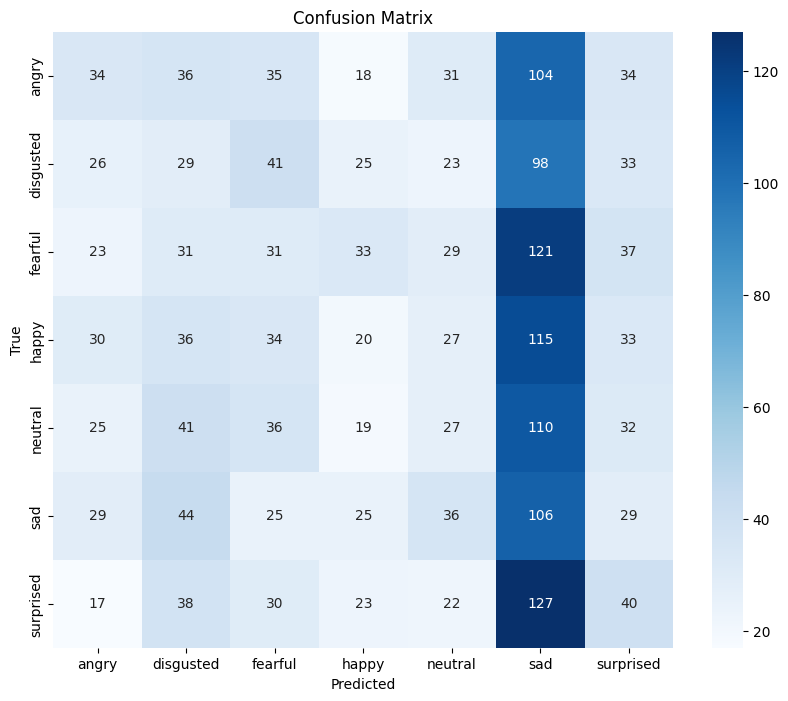

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your emotions as target names
emotion_labels = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=emotion_labels))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with emotion labels
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


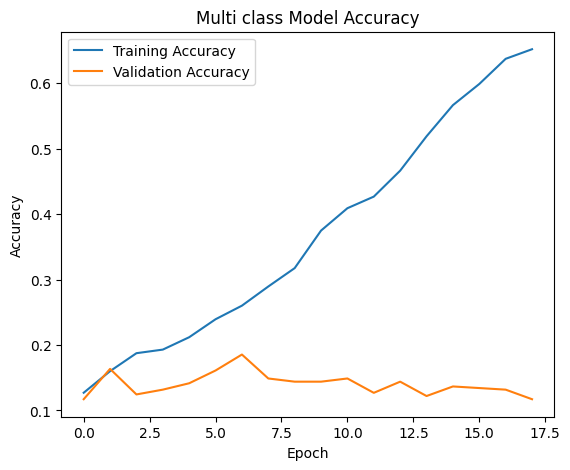

In [58]:
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Multi class Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

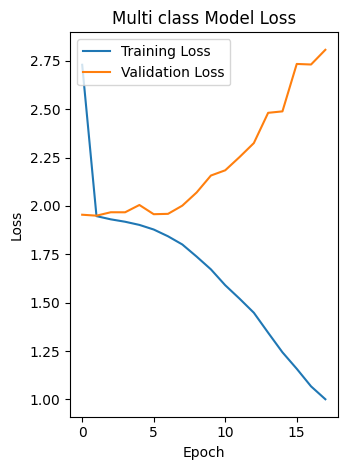

In [60]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Multi class Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

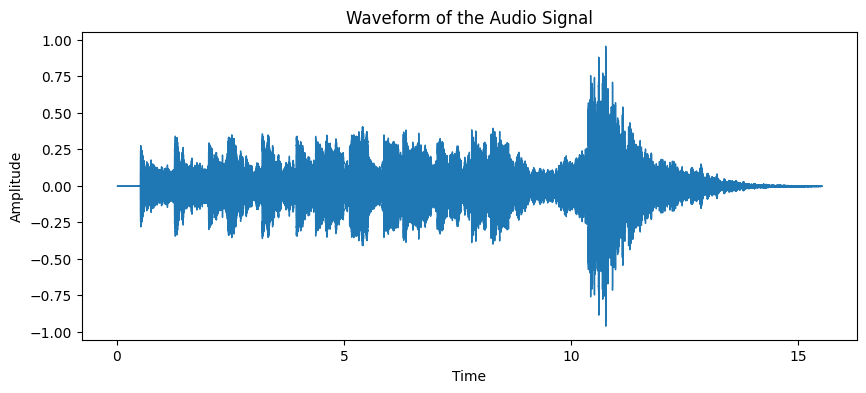

In [70]:
import librosa.display

# Load audio
audio, sr = librosa.load(input_audio_path, sr=16000)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of the Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


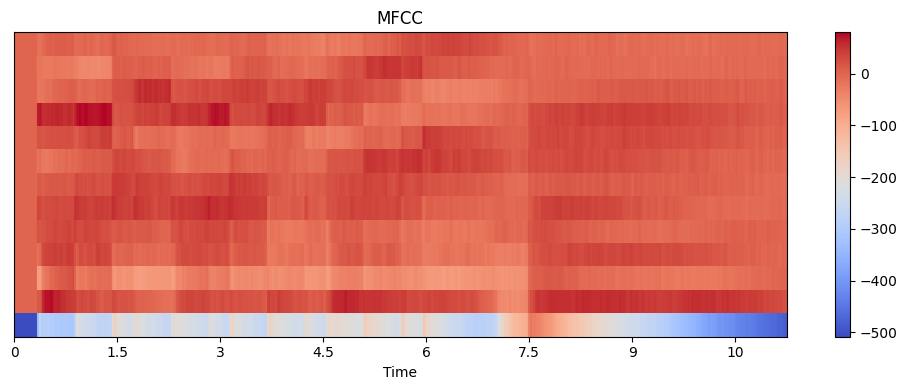

In [71]:
# Plot MFCCs
mfcc_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


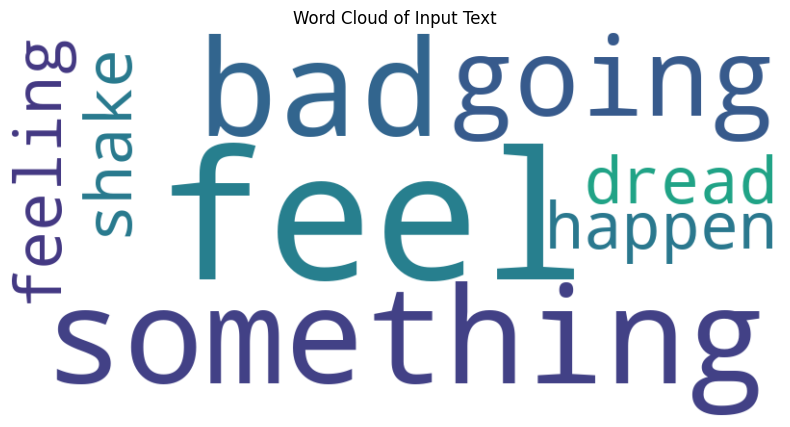

In [72]:
from wordcloud import WordCloud

# Assuming you have a corpus of text data (e.g., input_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(input_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Input Text')
plt.show()


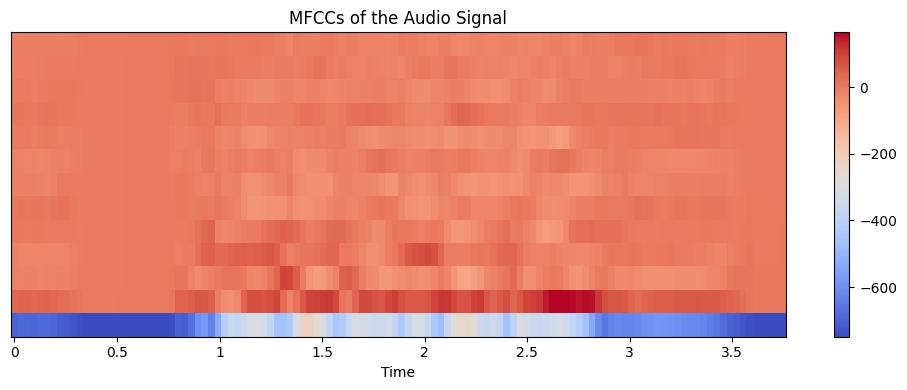

In [84]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_path = '/content/audio_dataset/Emotions/Happy/03-01-03-01-01-01-03.wav'  # Example audio file
audio, sr = librosa.load(audio_path, sr=16000)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs of the Audio Signal')
plt.tight_layout()
plt.show()


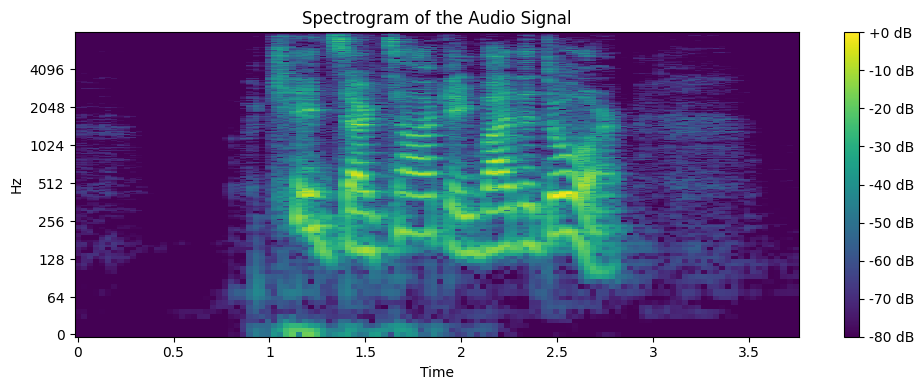

In [85]:
# Generate and plot the spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio Signal')
plt.tight_layout()
plt.show()


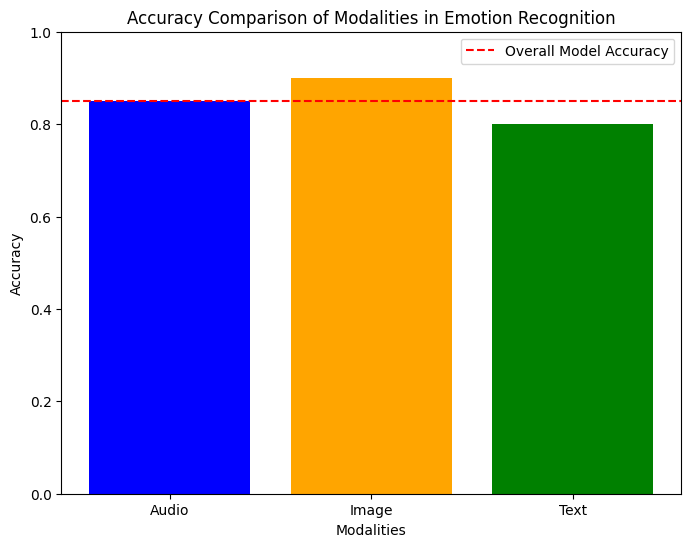

In [86]:
# Example performance metrics for each modality
modality_names = ['Audio', 'Image', 'Text']
accuracy_scores = [0.85, 0.90, 0.80]  # Replace with your actual accuracy scores

plt.figure(figsize=(8, 6))
plt.bar(modality_names, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Modalities')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Modalities in Emotion Recognition')
plt.ylim(0, 1)
plt.axhline(y=0.85, color='r', linestyle='--', label='Overall Model Accuracy')
plt.legend()
plt.show()


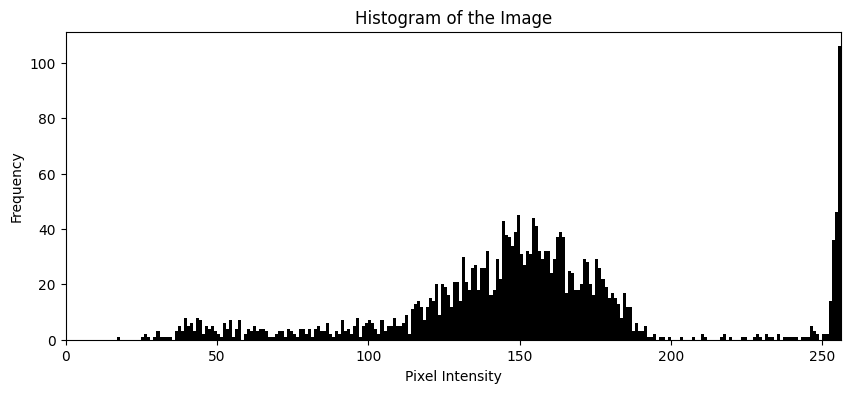

In [87]:
import cv2

# Load image
image_path = '/content/image_dataset/test/disgusted/im1.png'  # Example image file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.show()


In [67]:
import numpy as np
from transformers import BertTokenizer, TFBertModel
from keras.models import load_model
import librosa
from PIL import Image

# Load pre-trained model
model = load_model('/content/multimodal_model.h5')

# Load BERT tokenizer and model for text feature extraction
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Preprocess image data
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.convert('RGB')  # Ensure 3 channels (RGB)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Preprocess audio data
def preprocess_audio(audio_path):
    audio, sr = librosa.load(audio_path, sr=16000)  # Load the audio file
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=59)  # Extract MFCC features
    mfcc_mean = np.mean(mfcc_features.T, axis=0)  # Compute the mean over time (feature averaging)
    mfcc_mean = np.expand_dims(mfcc_mean, axis=0)  # Add batch dimension
    return mfcc_mean

# Preprocess text data
def preprocess_text(text):
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=128)
    outputs = bert_model(inputs)[0]
    text_features = np.mean(outputs, axis=1)  # Just calculate mean over embeddings
    return text_features

# Get user input
input_text = input("Enter text for emotion recognition: ")
input_image_path = input("Enter the path to an image file: ")
input_audio_path = input("Enter the path to an audio file: ")

# Preprocess inputs
text_features = preprocess_text(input_text)
image_features = preprocess_image(input_image_path)
audio_features = preprocess_audio(input_audio_path)

# Make predictions
predictions = model.predict([audio_features, image_features, text_features])
predicted_class = np.argmax(predictions, axis=1)

# Emotion labels
emotion_labels = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Output prediction
print(f"Predicted Emotion: {emotion_labels[predicted_class[0]]}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Enter text for emotion recognition: I feel like something bad is going to happen, and I can't shake this feeling of dread.
Enter the path to an image file: /content/fe_samp.png
Enter the path to an audio file: /content/happy-outro-8110.wav


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Predicted Emotion: fearful
